In [97]:
import pickle
import healpy as hp
import numpy as np

with open(f"/Users/akotamraju/Documents/dev/URAP/main-responseapprox/logs/noised-images/revived-jazz-4/40-truth.npy", "rb") as handle:
    truth_cone = np.load(handle)

with open(f"/Users/akotamraju/Documents/dev/URAP/main-responseapprox/logs/noised-images/revived-jazz-4/40.npy", "rb") as handle:
    pred_cone = np.load(handle)

NSIDE = 128
x_dim = 1024
y_dim = 768

In [98]:
import sys
sys.path.append("../utils")

from mapping import reconstruct_from_cartesian

# Load the position map
with open(f'../../mappings/NSIDE_{NSIDE}_x{x_dim}_y{y_dim}.pkl', 'rb') as f:
    cart_to_heal_map = pickle.load(f)

In [114]:
DEPTH = 4
truth_cross_sec = truth_cone[DEPTH]
pred_cross_sec = pred_cone[DEPTH]

In [115]:
# Convert to healpix
heal_truth_cross_sec = reconstruct_from_cartesian(truth_cross_sec, NSIDE, cart_to_heal_map)
heal_pred_cross_sec = reconstruct_from_cartesian(pred_cross_sec, NSIDE, cart_to_heal_map)

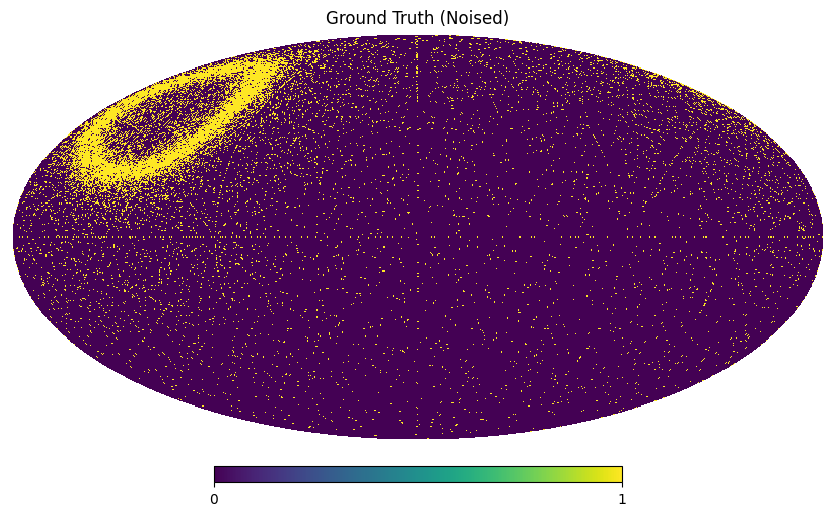

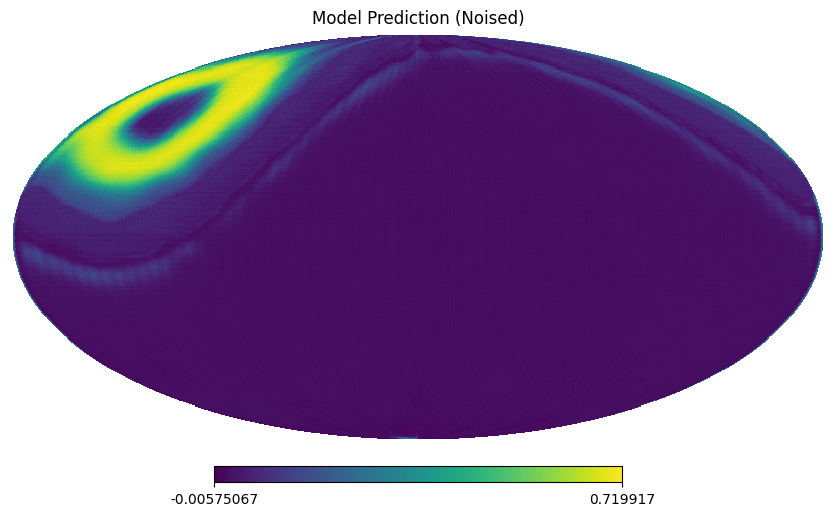

In [116]:
hp.mollview(heal_truth_cross_sec, title="Ground Truth (Noised)")
hp.mollview(heal_pred_cross_sec, title="Model Prediction (Noised)")

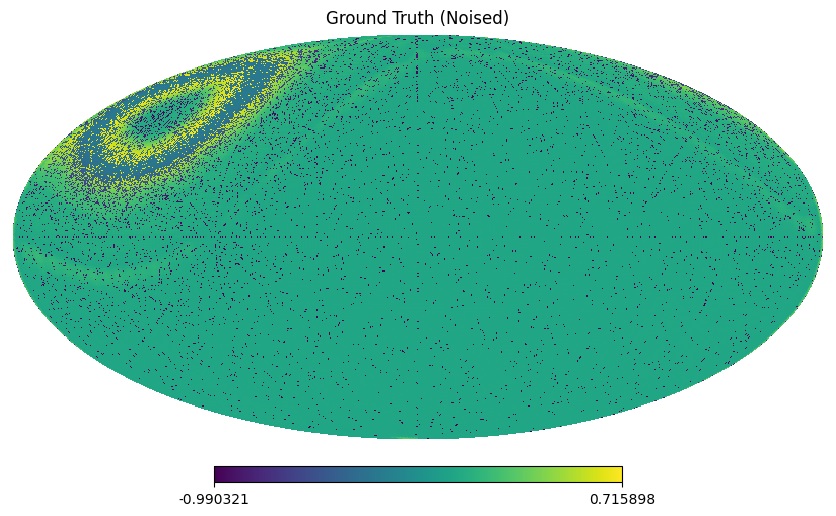

In [117]:
hp.mollview(heal_pred_cross_sec - heal_truth_cross_sec, title="Ground Truth (Noised)")


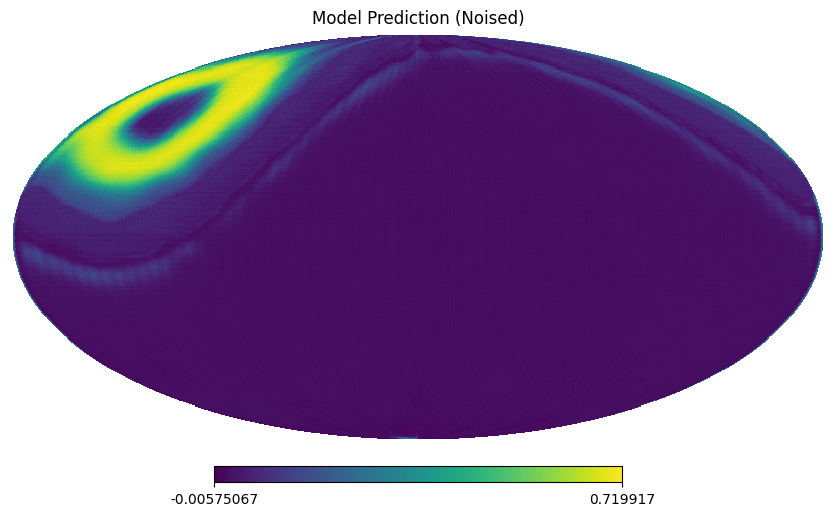

In [118]:
hp.mollview(heal_pred_cross_sec, title="Model Prediction (Noised)")

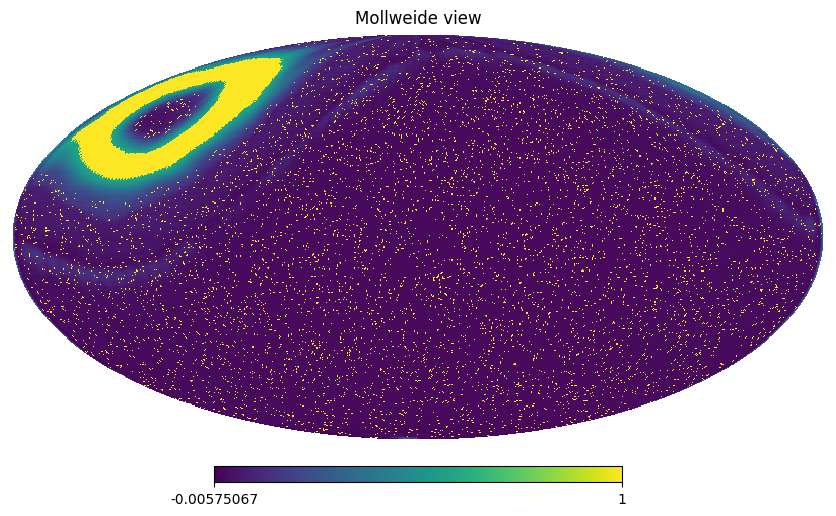

In [135]:
import random

gaussed = np.copy(heal_pred_cross_sec)

for i in range(len(gaussed)):
    if gaussed[i] <= 0.2:
        k = random.randint(0, 100)
        if k >= 97:
            gaussed[i] = 1
    
    if gaussed[i] > 0.6:
        gaussed[i] = 1
    

hp.mollview(gaussed)